In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!pip install spacy

In [4]:
import pandas as pd
import numpy as np
import spacy
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

print("Path to dataset files:", path)

100%|██████████| 25.7M/25.7M [00:00<00:00, 56.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/versions/1


In [8]:
data = pd.read_csv('/IMDB Dataset.csv')

In [9]:
data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [10]:
nlp = spacy.load("en_core_web_sm")
def clean_text_spacy(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop])

In [11]:
data['cleaned_review'] = data['review'].apply(clean_text_spacy)

data.head(20)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch 1 oz episode hook . rig...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production . < br /><br />the...
2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,basically family little boy ( Jake ) think zom...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei "" love Time money "" visually stu..."
5,"Probably my all-time favorite movie, a story o...",positive,"probably - time favorite movie , story selfles..."
6,I sure would like to see a resurrection of a u...,positive,sure like resurrection date Seahunt series tec...
7,"This show was an amazing, fresh & innovative i...",negative,"amazing , fresh & innovative idea 70 air . 7 8..."
8,Encouraged by the positive comments about this...,negative,encourage positive comment film look forward w...
9,If you like original gut wrenching laughter yo...,positive,like original gut wrench laughter like movie ....


In [12]:
X = data['cleaned_review']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train.ravel())
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

best_model = grid_search.best_estimator_

In [15]:
y_pred = best_model.predict(X_test_tfidf)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8854


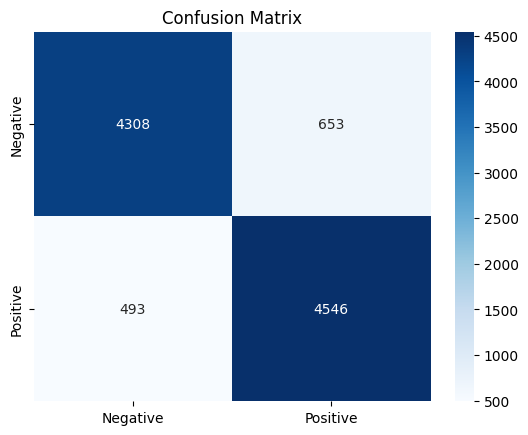

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.show()

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.87      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



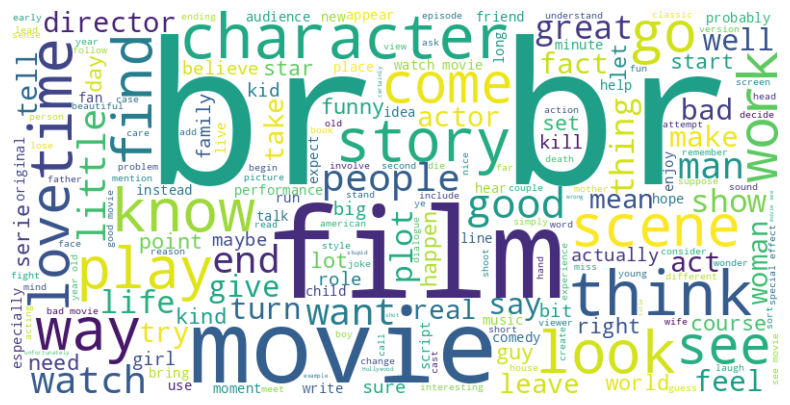

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(X_train.ravel()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
# Cross Validation to get a better evaluation of the model
cv_scores = cross_val_score(best_model, X_train_tfidf, y_train, cv=5)
print(f"Cross Validation Scores: {cv_scores}")
print(f"Average CV Score: {cv_scores.mean():.4f}")

Cross Validation Scores: [0.881    0.888625 0.883625 0.881625 0.87975 ]
Average CV Score: 0.8829


*prediction*

In [22]:
a=input("Enter the review: ")
input_text =[a]
input_text_tfidf = vectorizer.transform(input_text)

prediction = best_model.predict(input_text_tfidf)
print(prediction)

Enter the review: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are ter